In [1]:
%pip install plotly -q
%pip install scipy -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Base idade e salário

In [5]:
from sklearn.cluster import KMeans

In [6]:
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]
y = [1000, 1200, 2900, 1850, 900, 950, 2000, 2100,
     3000, 5900, 4100, 5100, 7000, 5000, 6500]

In [7]:
graph = px.scatter(x = x, y = y)
graph.show()

In [8]:
base_salary = np.array([
  [age, salary]
  for age, salary in zip(x, y)
])
base_salary

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

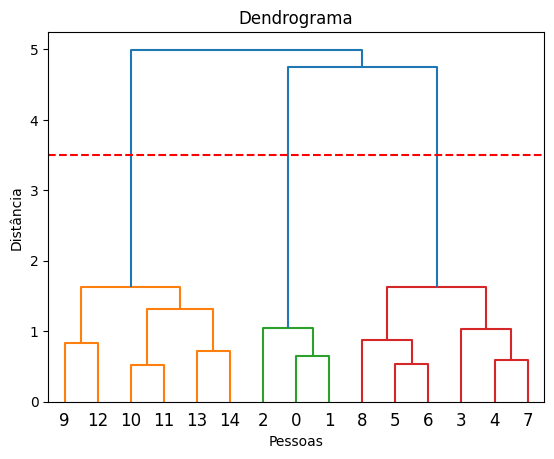

In [ ]:
dendrogram_ = dendrogram(linkage(base_salary, method="ward"))
plt.title("Dendrograma")
plt.xlabel("Pessoas")
plt.ylabel("Distância")

plt.axhline(y=3.5, color='r', linestyle='--');

A linha representa o número ideal de cluster, que no caso é 3, pois a reta da direita não cruza com nenhum ponto na horizontal, com base isso essa reta seria um bom ponto de análise.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_salary = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity="euclidean")
labels = hc_salary.fit_predict(base_salary)

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
labels

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
graph = px.scatter(x = base_salary[:,0], y = base_salary[:,1], color = labels)
graph.show()

# Base dados cartão de crédito

- Fonte: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [15]:
base_credit_card = pd.read_csv("../../assets/credit_card_clients.csv", header=1)
base_credit_card

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [16]:
base_credit_card['BILL_TOTAL'] = base_credit_card['BILL_AMT1'] + base_credit_card['BILL_AMT2'] + base_credit_card['BILL_AMT3'] + base_credit_card['BILL_AMT4'] + base_credit_card['BILL_AMT5'] + base_credit_card['BILL_AMT6']

In [17]:
base_credit_card

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [18]:
X_credit_card = base_credit_card.iloc[:, [1, 25]].values
X_credit_card

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [19]:
scaler_credit_card = StandardScaler()
X_credit_card = scaler_credit_card.fit_transform(X_credit_card)

In [20]:
X_credit_card

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
dendrogram_ = dendrogram(linkage(X_credit_card, method="ward"))

In [ ]:
hc_credit_card = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
c = hc_credit_card.fit_predict(X_credit_card)

In [ ]:
hc_credit_card

In [ ]:
px.scatter(x = X_credit_card[:, 0], y = X_credit_card[:, 1], color=labels)

# DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
dbscan_salary = DBSCAN(eps = 0.95, min_samples=2)
dbscan_salary.fit(base_salary)

DBSCAN(eps=0.95, min_samples=2)

In [12]:
labels = dbscan_salary.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
graph = px.scatter(x = base_salary[:,0], y = base_salary[:,1], color = labels)
graph.show()

## Base de dados de cartão de crédito

In [21]:
dbscan = DBSCAN(eps=0.37, min_samples=5)
labels = dbscan.fit_predict(X_credit_card)

In [22]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [24]:
graph = px.scatter(x = X_credit_card[:,0], y = X_credit_card[:,1], color = labels)
graph.show()

# Comparativo entre K-means, Hierárquico e DBSCAN

In [25]:
from sklearn import datasets

In [26]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [27]:
X_random

array([[ 1.05003012,  0.29683763],
       [ 2.02564947,  0.14229659],
       [-0.90633197,  0.15319957],
       ...,
       [ 0.37845774, -0.31300742],
       [-0.82858448,  0.35016885],
       [ 0.92065861, -0.6534392 ]])

In [28]:
y_random

array([0, 1, 0, ..., 1, 0, 1])

In [29]:
np.unique(y_random)

array([0, 1])

In [30]:
graph = px.scatter(x = X_random[:,0], y = X_random[:,1])
graph.show()

In [31]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X_random)
graph = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = labels)
graph.show()

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [32]:
dbscan = DBSCAN(eps=0.1)
labels = dbscan.fit_predict(X_random)
graph = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = labels)
graph.show()